In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import sympy as sy

- Calculate the following integral:

$$\int_1^3 \sqrt{x} dx = \frac{2}{3} x^{3/2} |_{1}^{3} = \frac{2}{3} 3^{3/2} - \frac{2}{3} 1^{3/2} = 2.7974$$

In [ ]:
x = sy.Symbol('x')
expr = sy.sqrt(x)
sy.pprint(expr)  # f(x)
sy.pprint(sy.integrate(expr, x))  # int f(x) dx
sy.integrate(expr, (x, 1, 3)).evalf()  # evaluating between 1 and 3

√x
   3/2
2⋅x   
──────
  3   


2.79743494847109

### Trabajo autónomo

**Graph the function in Python**

- Think on how you draw a plot on a graph paper

![](https://mathbits.com/MathBits/StudentResources/GraphPaper/quadone.gif)

- Implement left and right Riemann sums in Python, to calculate the area of $f(x) = \sqrt{x}$ in the interval [1,3]: 
  - https://www.khanacademy.org/math/ap-calculus-ab/ab-integration-new/ab-6-2/a/left-and-right-riemann-sums

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/RightRiemann2.svg/220px-RightRiemann2.svg.png)

### Área 

$$A = w \times \sum_i f(x_i) = \frac{b-a}{n_r} \times \sum_i f(x_i)$$

2.7235262246401075

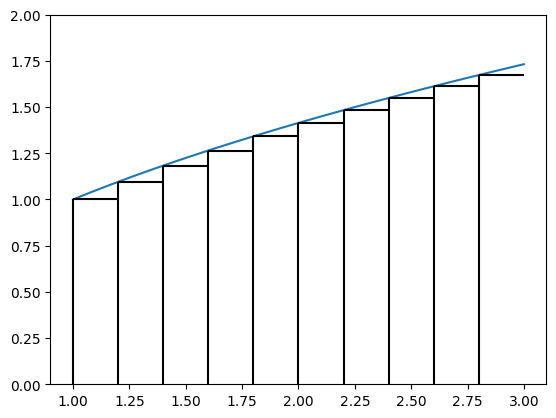

In [ ]:
# Plot the function and implement the integration

a, b = 1, 3

f = lambda x: np.sqrt(x)
n = 100
x = np.linspace(a, b, n)

n_r = 10
w_r = (b - a)/n_r
x_r =  np.linspace(a, b, n_r+1)

plt.plot(x, f(x))
plt.ylim(0,2)
for i in range(n_r):
    plt.vlines(x_r[i], 0, f(x_r[i]), colors='k')
    plt.hlines(f(x_r[i]), x_r[i], x_r[i]+w_r, colors='k')
w_r, x_r, x_r[:-1] 
f(x_r[:-1]).sum()*w_r

Mid point: 2.7974384704839452
Left sum: 2.7901073963112
Right sum: 2.804748412462578


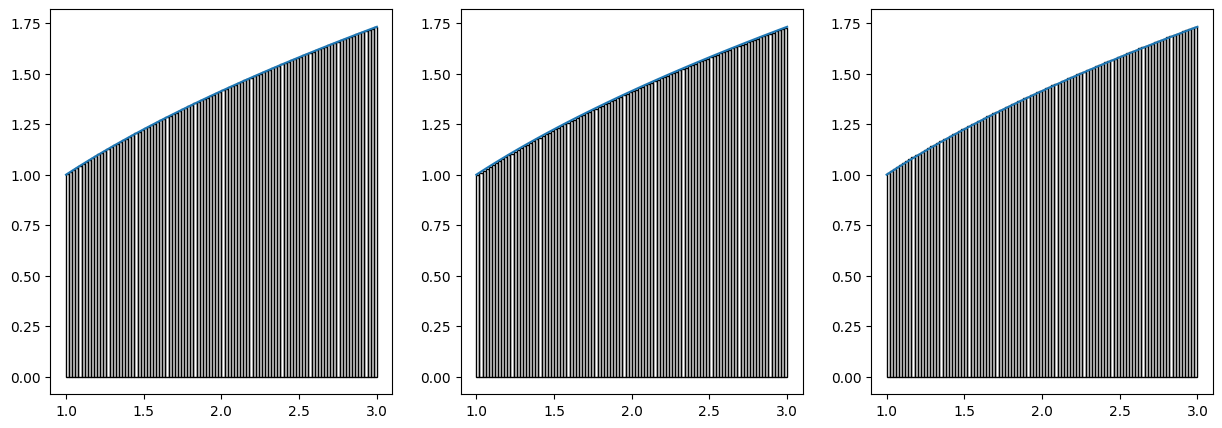

In [ ]:
def riemann_sum(f, a, b, rn=10, method='mid', ax=None):
    
    if ax is None: fig, ax = plt.subplots()
    
    x = np.linspace(a, b, 100)  # Rango para la variable x
    fx = f(x)  # Evaluamos f(x)
    ax.plot(x, fx)  # Graficamos x, fx
    width = (b - a) / (rn)
    rectangles = np.linspace(a, b, rn+1)

    if method == 'mid':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f((rectangles[:-1]+rectangles[1:])/2))]
        print("Mid point:", f((rectangles[:-1]+rectangles[1:])/2).sum()*width)
    if method == 'left':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f(rectangles[:-1]))]
        print("Left sum:", f(rectangles[:-1]).sum()*width)
    if method == 'right':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f(rectangles[1:]))]
        print("Right sum:", f(rectangles[1:]).sum()*width)

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15,5))
method = ['mid', 'left', 'right']
rs = [riemann_sum(f, 1, 3, rn=100, method=m, ax=ax[i]) for i, m in enumerate(method)]

### Monte Carlo Integration

- Check the slides in UDLA Brightspace

### Monte Carlo: Sampling method

2.847741552292

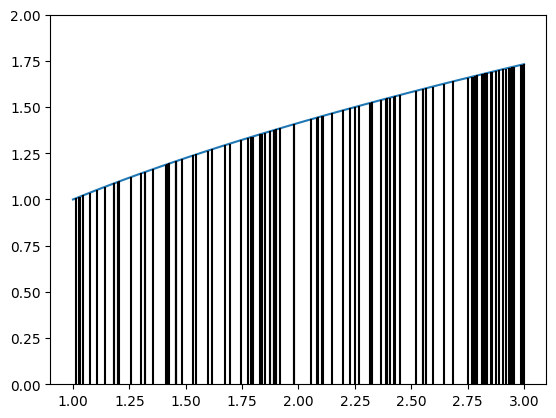

In [ ]:
# Code
a, b = 1, 3

n_r = 100

w_r = (b-a)/n_r

x = np.linspace(a, b)
plt.plot(x, f(x))
plt.ylim(0, 2)

x_random = np.random.random(size=n_r)*(b-a)+a
plt.vlines(x_random, 0, f(x_random), colors='k')

f(x_random).sum()*w_r

### Monte Carlo: Hit and miss method

<img src="image-20231013-191558-20231014-001602.png" width="" align="" />

2.712

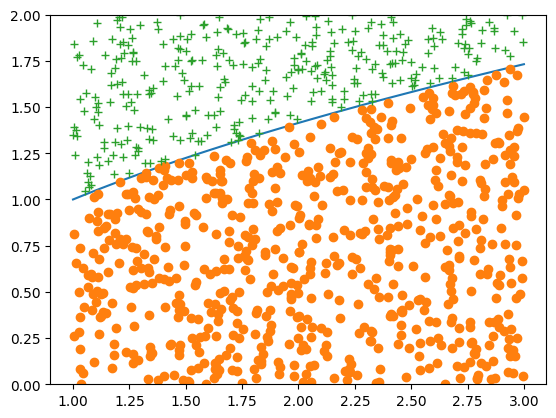

In [ ]:
# Code

# Code
a, b = 1, 3
c = 2  # height

n_r = 1000  # number of darts (points)

x = np.linspace(a, b)
plt.plot(x, f(x))
plt.ylim(0, 2)

A_board = (b-a)*c
x_random = np.random.random(size=n_r)*(b-a)+a
y_random = np.random.random(size=n_r)*c

puntos_dentro = np.where(f(x_random) > y_random)
puntos_fuera = np.where(f(x_random) < y_random)

plt.plot(x_random[puntos_dentro], 
y_random[puntos_dentro], 'o')
plt.plot(x_random[puntos_fuera], 
y_random[puntos_fuera], '+')
len(puntos_dentro[0])+len(puntos_fuera[0])
A_board*len(puntos_dentro[0])/n_r

### Appendix: Numerical Integration

- See: https://www.zweigmedia.com/RealWorld/integral/numint.html

<img src="image-20231013-191558.png" width="" align="" />

### Some extra examples of simulating probability and randomness

1. What is the probability of a 1D random walk returning to the origin.

2. A certain family has 6 children, consisting of 3 boys and 3 girls. Assuming that all birth orders are equally likely, what is the probability that the 3 eldest children are the 3 girls?

3. A city with 6 districts has 6 robberies in a particular week. Assume the robberies are located randomly, with all possibilities for which robbery occurred where equally likely. What is the probability that some district had more than 1 robbery?

4. Tyrion, Cersei, and ten other people are sitting at a round table, with their seating arrangement having been randomly assigned. What is the probability that Tyrion and Cersei are sitting next to each other?


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>